In [17]:
## Common python packages
import numpy as np
import pandas as pd

## For plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")
sns.set_color_codes()
import hist, mplhep

## sklearn - ML tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.utils import resample, shuffle

from xgboost.sklearn import XGBClassifier
import xgboost as xgb

## weighted stats
from statsmodels.stats.weightstats import DescrStatsW

## uproot
import uproot3
import uproot

## "-" sign for graphs
rcParams['axes.unicode_minus'] = False

## Some extra styling
def namestr(obj, namespace = globals()):
    "Prints the name of a variable"
    return [name for name in namespace if namespace[name] is obj][0]

## For time
from time import time

In [18]:
## Univar Tools
def data_stats(df, cols = None):
    cols = df.columns if cols is None else cols
    return pd.DataFrame({"Mean": df[cols].mean, "Med": df[cols].median(), "STD": df[cols].std, 
                         "Min": df[cols].min(), "Max": df[cols].max()})
              
def hist_plotter(df, cols = None, range_x = None, n_std = 1, size = None, nbin = 100):
    cols = df.select_dtypes(include=np.number).columns if cols is None else cols
    for col in cols:
        range_ = [df[col].min() + n_std * df[col].std(), df[col].max() - n_std * df[col].std()] if range_x is None else range_x
        fig, ax = plt.subplots(1,1)
        df[col].plot(kind = "hist", range = range_, edgecolor = "blue", alpha = 1, bins = nbin, density = 1, ax = ax, figsize = size)
        plt.xlabel(col)
        plt.show()
    
def box_plotter(df, cols = None):
    cols = df.columns if cols is None else cols
    fig, ax = plt.subplots(1, 1)
    df[cols].boxplot(ax=ax)
    plt.xticks(rotation = 90)
    plt.show()

In [19]:
## Bivar Tools
def data_corr(df, size = None, cols = None):
    cols = df.columns if cols is None else cols 
    size = (len(cols), len(cols)) if size is None else size
    plt.figure(figsize = size)
    sns.heatmap(df.corr(), cmap = "coolwarm", square = True, vmin = -1, vmax = 1, annot=True)
    plt.show()

In [20]:
df_GSCPI = pd.read_csv("datasets_hi4/extra-dataset/GSCPI_data.csv")

In [21]:
df_GSCPI.head()

,Year-Month,GSCPI
0,2020-01,0.090108
1,2020-02,1.191976
2,2020-03,2.546002
3,2020-04,3.161703
4,2020-05,2.537110


In [22]:
data_stats(df_GSCPI.drop(columns=["Year-Month"]))

,Mean,Med,STD,Min,Max
GSCPI,<bound method NDFrame._add_numeric_operations....,1.908749,<bound method NDFrame._add_numeric_operations....,-1.544344,4.29331


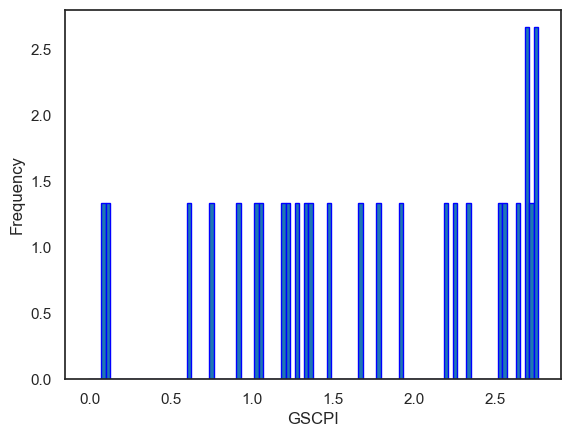

In [23]:
hist_plotter(df_GSCPI)

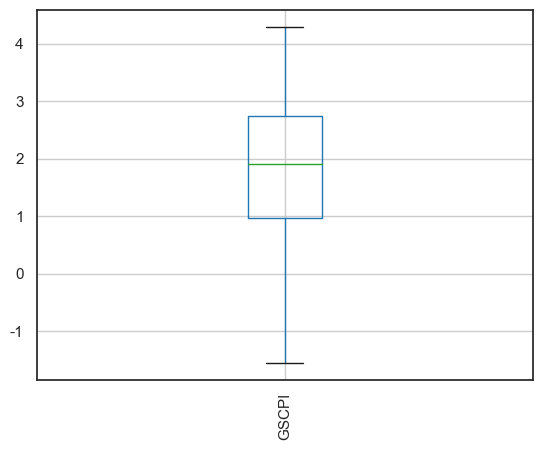

In [24]:
box_plotter(df_GSCPI)

In [25]:
df_GSCPI.isna().sum()

Year-Month    0
GSCPI         0
dtype: int64

In [27]:
df_GSCPI.shape

(43, 2)